In [26]:
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install matplotlib

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
layoff_filepath = 'layoffs.csv'
layoffdf = pd.read_csv(layoff_filepath)

In [69]:
layoffdf.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,New Work,Hamburg,Consumer,400.0,NaN,2024-01-11,Post-IPO,Germany,NaN
1,Playtika,Tel Aviv,Consumer,300.0,0.10,2024-01-11,Post-IPO,Israel,NaN
2,Discord,SF Bay Area,Consumer,170.0,0.17,2024-01-11,Series H,United States,995.0
3,Inmobi,Bengaluru,Marketing,125.0,0.05,2024-01-11,Unknown,India,320.0
4,Audible,New York City,Media,100.0,0.05,2024-01-11,Acquired,United States,14.0


### Column Names

In [70]:
columns = layoffdf.columns
columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

### Column types

In [71]:
layoffdf.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

### Check Null

In [72]:
layoffdf.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1124
percentage_laid_off    1172
date                      0
stage                     7
country                   0
funds_raised            351
dtype: int64

## Numeric Columns Data exploration

In [73]:
layoffdf.describe().round(2)

,total_laid_off,percentage_laid_off,funds_raised
count,2189.00,2141.00,2962.00
mean,242.15,0.28,775.06
std,767.38,0.28,4886.78
min,3.00,0.00,0.00
25%,40.00,0.10,51.00
50%,80.00,0.17,163.00
75%,180.00,0.30,454.50
max,12000.00,1.00,121900.00


### 'total_laid_off' feature:

<Axes: xlabel='total_laid_off', ylabel='Count'>

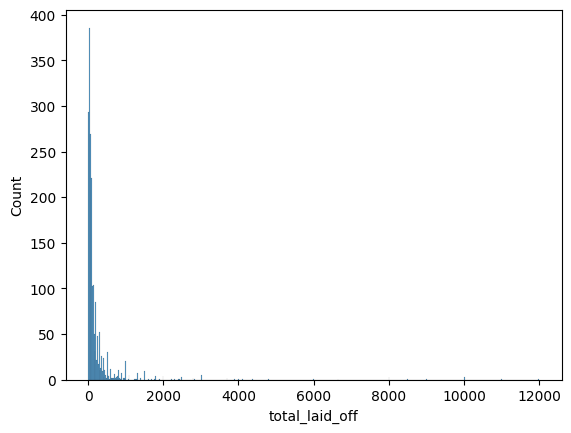

In [74]:
# plot
sns.histplot(layoffdf['total_laid_off'])

<Axes: xlabel='total_laid_off', ylabel='Count'>

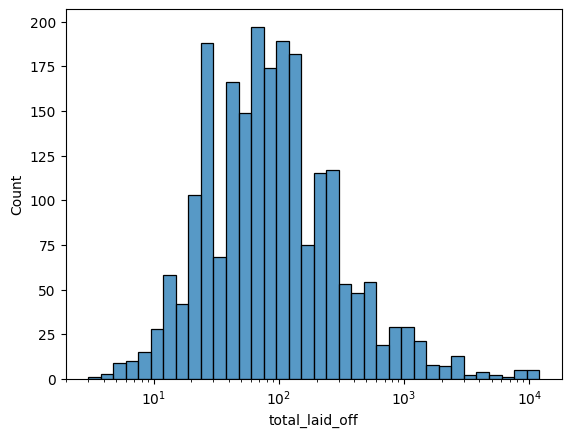

In [75]:
# plot with log scale
sns.histplot(layoffdf['total_laid_off'],log_scale=True)

percentage_laid_off: 

<Axes: xlabel='percentage_laid_off', ylabel='Count'>

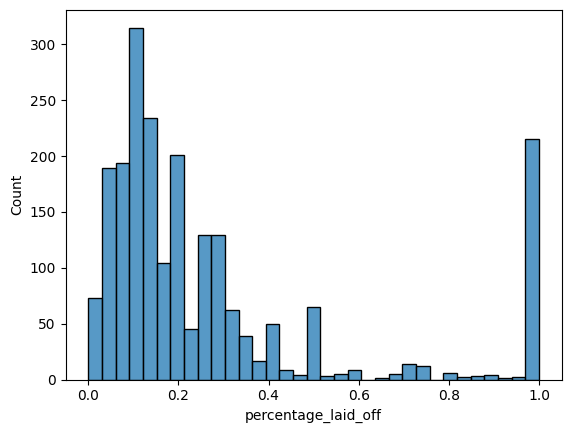

In [76]:
sns.histplot(layoffdf['percentage_laid_off'])

funds_raised:

<Axes: xlabel='funds_raised', ylabel='Count'>

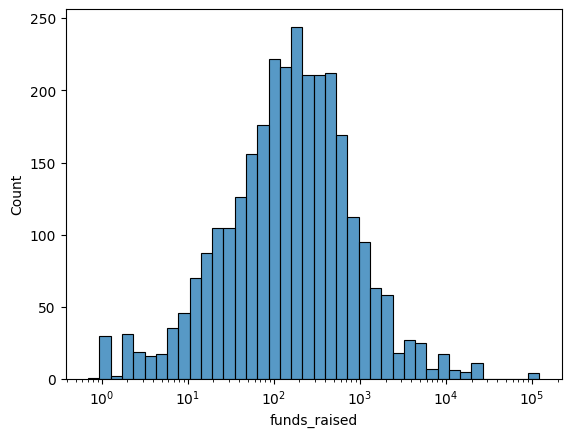

In [77]:
sns.histplot(layoffdf['funds_raised'],log_scale=True)

Correlations:

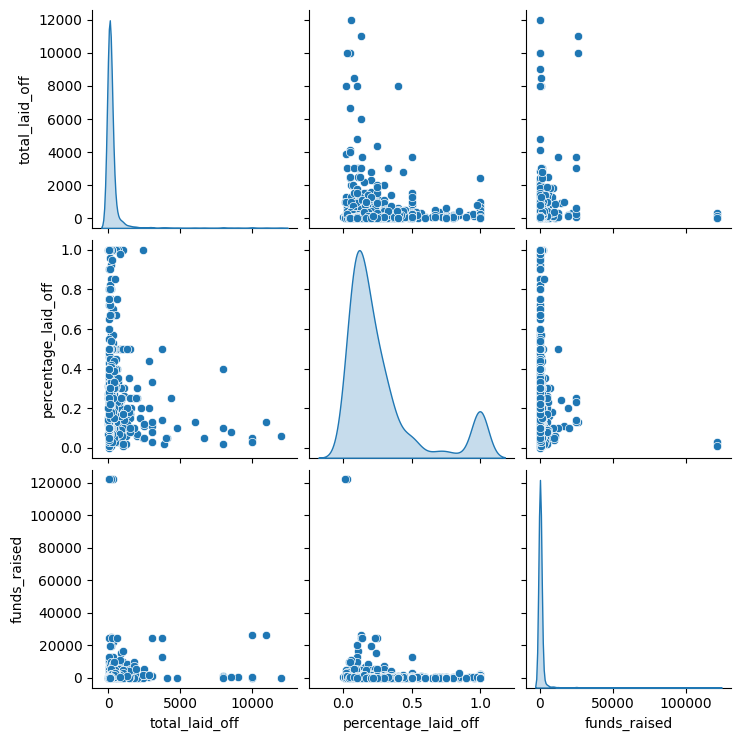

In [78]:
sns.pairplot(layoffdf, diag_kind='kde')

## Object type Data exploration

In [79]:
layoffdf.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

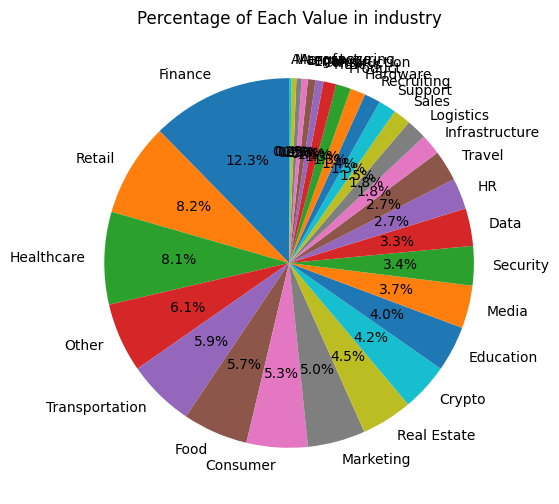

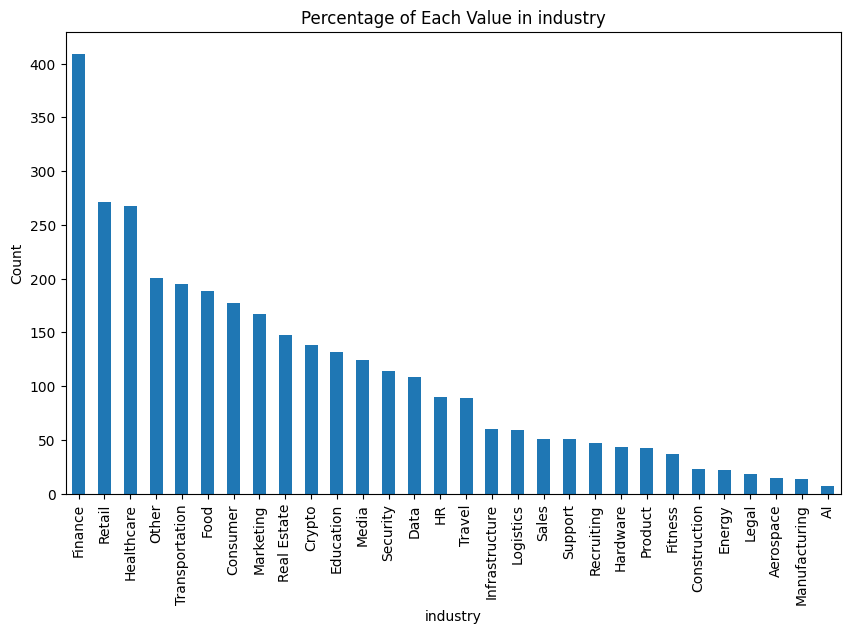

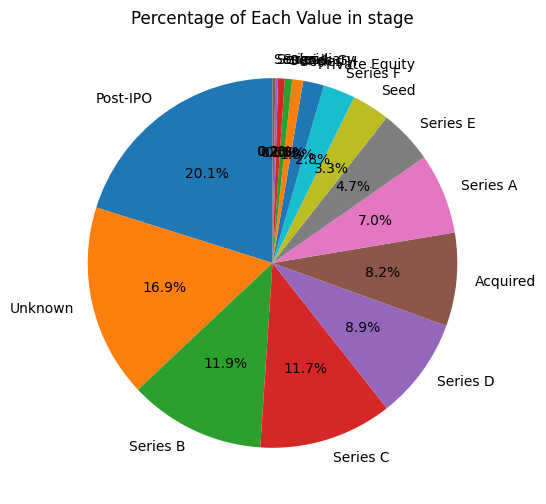

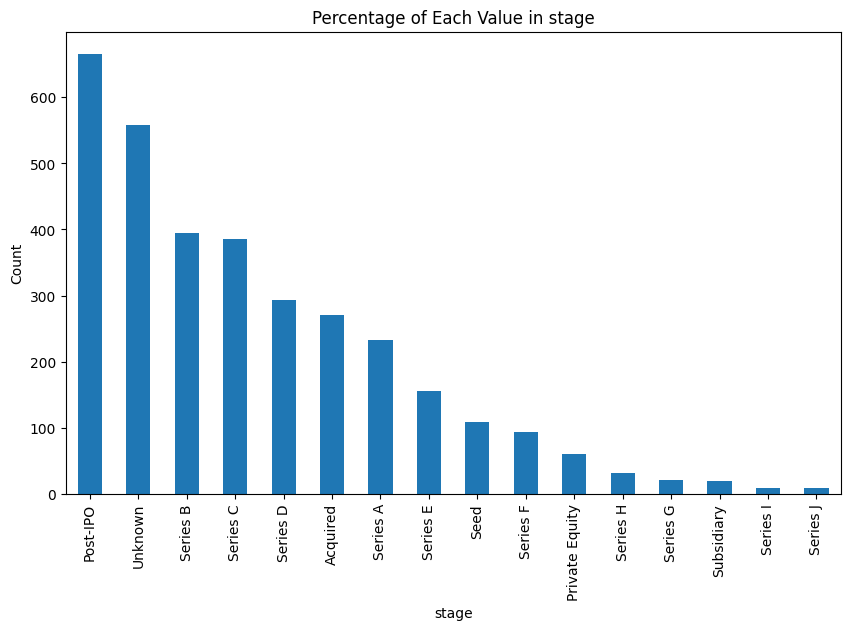

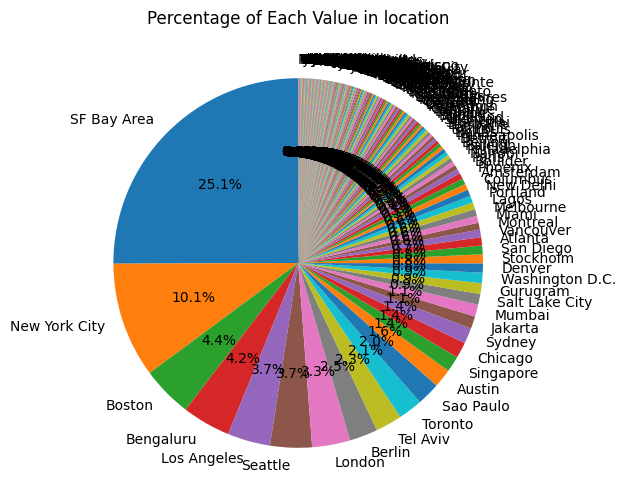

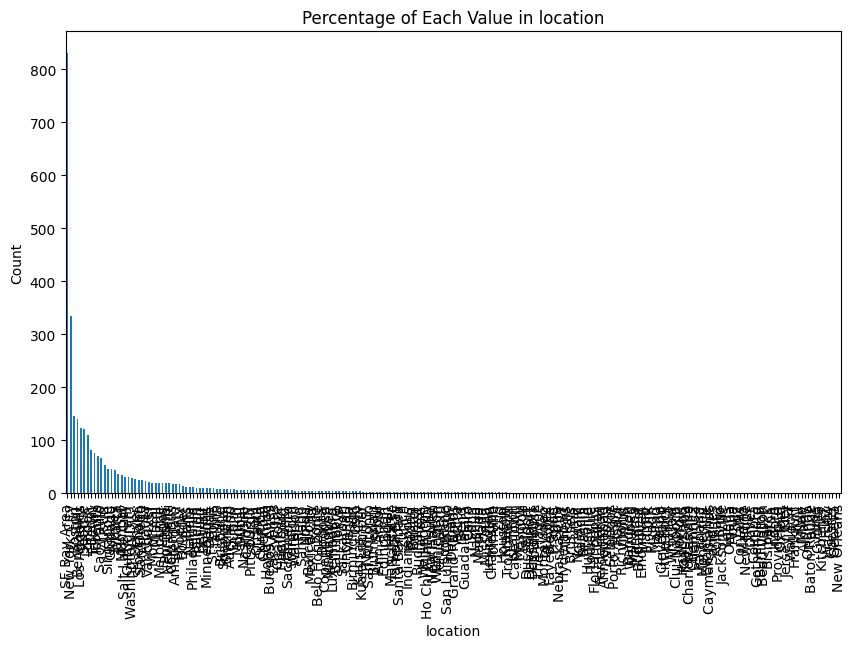

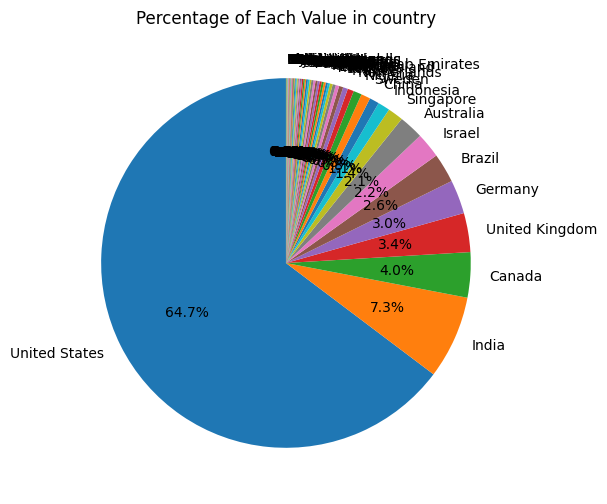

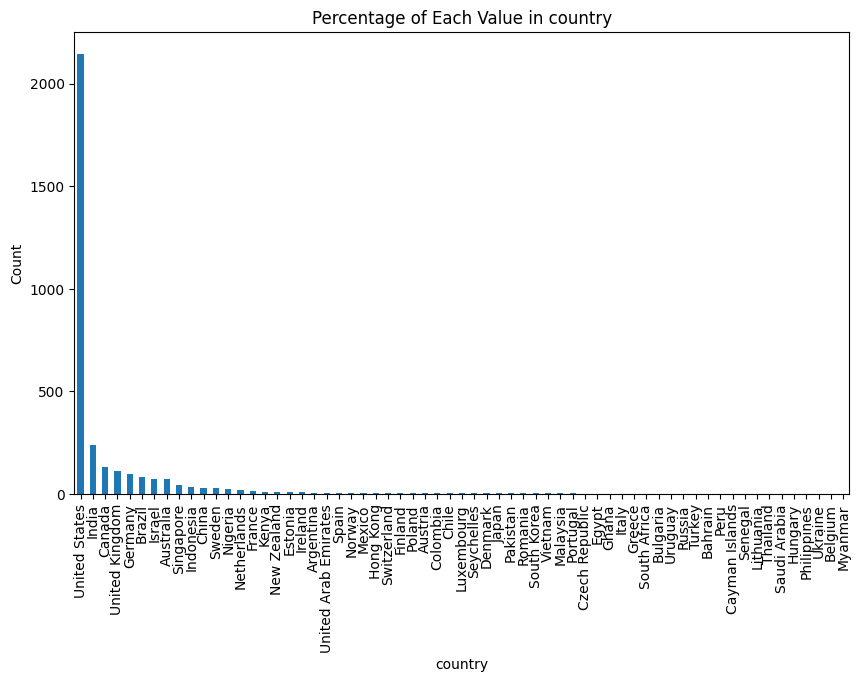

In [80]:
column_names = ['industry', 'stage','location', 'country']
for column_name in column_names:
    value_counts = layoffdf[column_name].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Percentage of Each Value in {column_name}')
    plt.show()

    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Percentage of Each Value in {column_name}')
    plt.ylabel('Count')
    plt.show()